In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn

#setting the device 
device = torch.device('mps')
print(f'all imports successfull and the device name is {device}')

all imports successfull and the device name is mps


In [102]:
#importing the dataset
df = pd.read_csv('./mushroom_cleaned.csv')
df.head(10)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [103]:
#getting the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [104]:
#checking for the null value in each of the column
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [105]:
#lets check the quantitative feature
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


<Axes: xlabel='cap-diameter', ylabel='Count'>

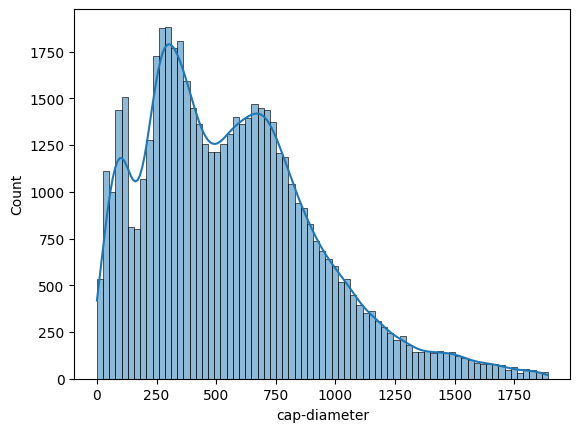

In [106]:
#lets do some data visualisation

sns.histplot(df['cap-diameter'],kde= True)

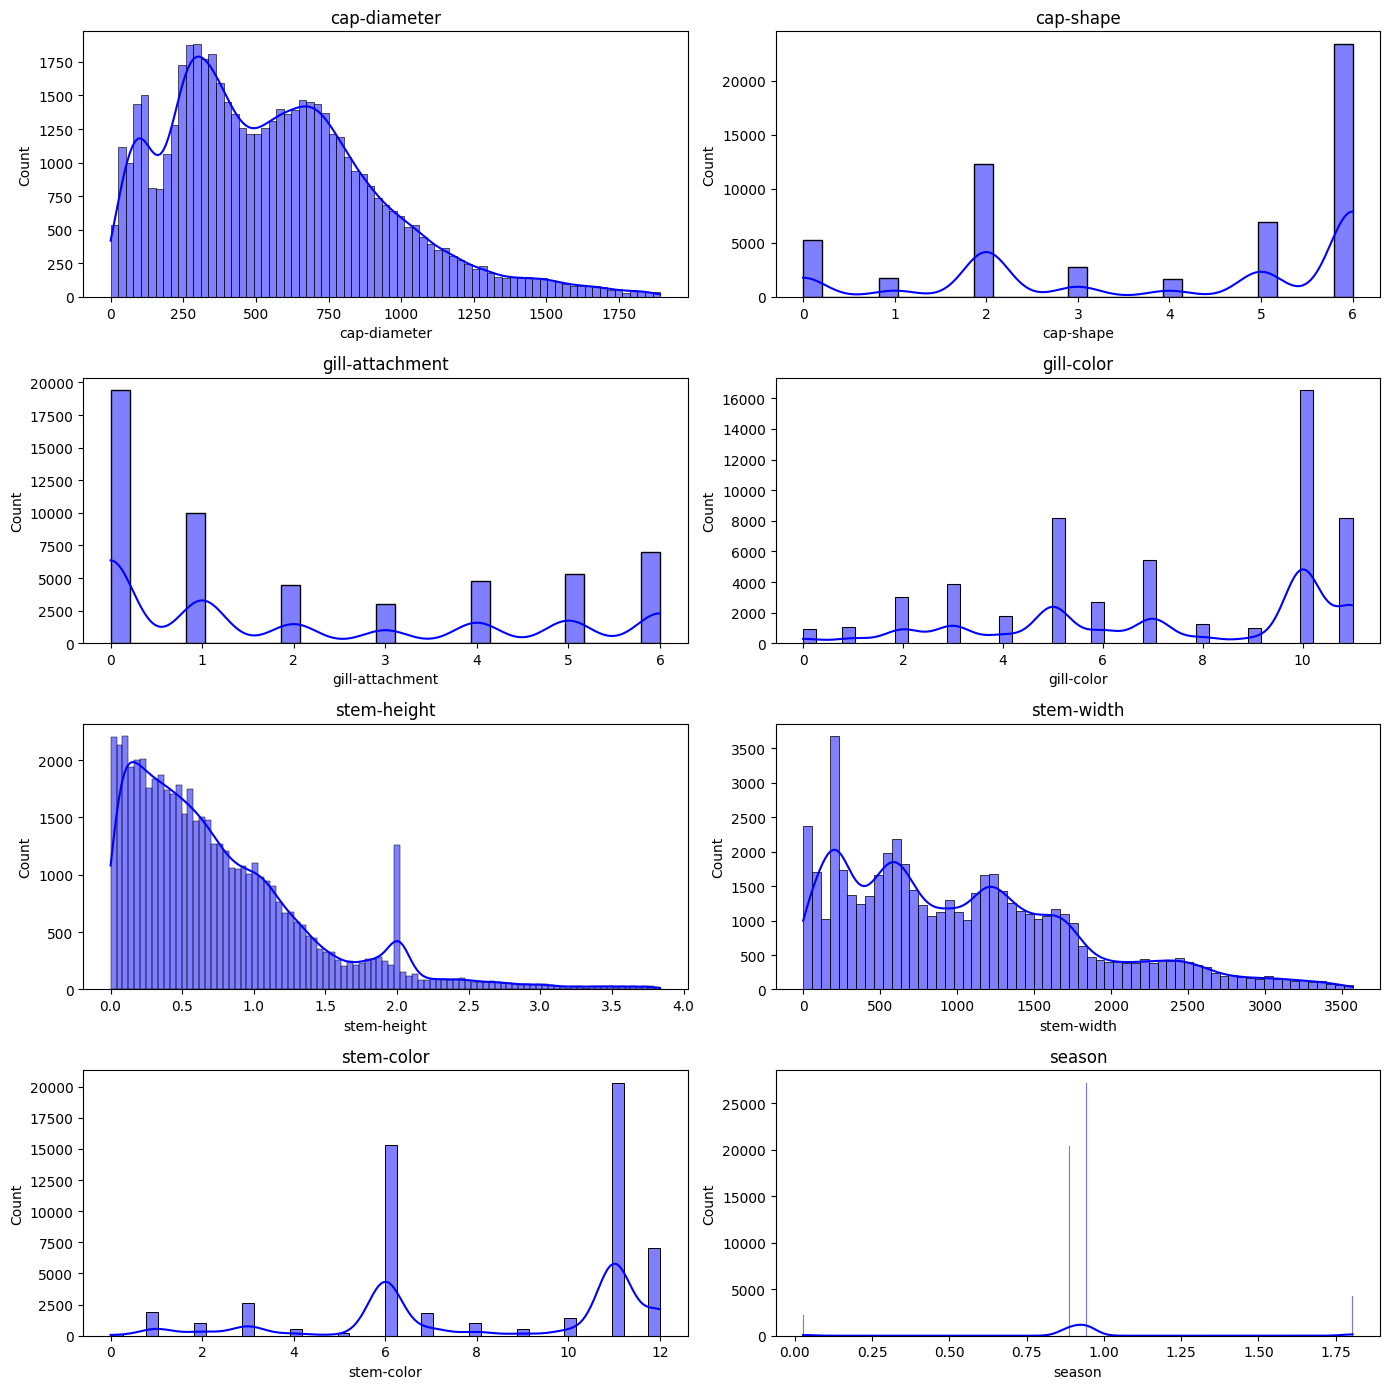

In [107]:
#plot the features
features = df.columns
n_rows = 4
n_cols = 2
plt.figure(figsize=(14,14))
for i, feature in enumerate(features):
    if feature == 'class':
        continue
    else:
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[feature],kde= True, color= 'blue')
        plt.title(feature)
#automatically adjust the layout for the plot
plt.tight_layout()
plt.show()

### Build model without any EDA (baseline model)

In [108]:
#doing the train test split
X = df.drop('class',axis= 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'length of X_train is: {X_train.shape})')
print(f'length of y_train is : {y_train.shape}')

length of X_train is: (43228, 8))
length of y_train is : (43228,)


In [109]:
#pandas to numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#numpy to tensors
X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

In [110]:
#defining the model architecture

class base_ANN(nn.Module):
    def __init__(self):
        super().__init__()
        #create the layer for the same
        self.layer1 = nn.Linear(in_features=8, out_features=32)
        self.layer2 = nn.Linear(in_features=32, out_features=64)
        self.layer3 = nn.Linear(in_features=64, out_features=32)
        self.layer4 = nn.Linear(in_features=32, out_features=16)
        self.layer5 = nn.Linear(in_features=16, out_features=8)
        self.out = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()
    
    #defining the forward pass for each iteration
    def forward(self,x):
        l1_out = self.relu(self.layer1(x))
        l2_out = self.relu(self.layer2(l1_out))
        l3_out = self.relu(self.layer3(l2_out))
        l4_out = self.relu(self.layer4(l3_out))
        l5_out = self.relu(self.layer5(l4_out))
        output_logits = self.out(l5_out)
        return output_logits

#creating instance for the model and transfer it to the mps system for faster calculation

model0 = base_ANN().to(device=device)
print(model0) 



base_ANN(
  (layer1): Linear(in_features=8, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=16, bias=True)
  (layer5): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [111]:
#lets define the loss function and accuracy for the same
loss_fun = nn.BCEWithLogitsLoss()
#defining the optimizer

optimizer = torch.optim.Adam(params=model0.parameters(),lr=0.001)

#accuracy function
def accuracy_function(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc



In [112]:
#defining the training and testing for the model

torch.manual_seed(42)

epochs = 500

#put data to device
X_train = X_train.to(device=device)
X_test = X_test.to(device=device)
y_train = y_train.to(device=device)
y_test = y_test.to(device=device)

for epoch in range(epochs):
    #start the training
    model0.train()

    #calculate the forward pass
    y_logits = model0(X_train).squeeze()
    #convert the raw output to probabilities using the sigmoidal function
    y_pred = torch.round(torch.sigmoid(y_logits))
    #calculate the loss
    loss = loss_fun(y_logits,y_train)
    #calculate the accuracy
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)

    #optimizer gradient setting to zero

    optimizer.zero_grad()

    #loss backward propogation
    loss.backward()

    #optmizer step

    optimizer.step()

    #for the testing side
    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test).squeeze()
        test_loss = loss_fun(test_logits,y_test)
        y_test_pred = torch.round(torch.sigmoid(test_logits))
        test_accuracy = accuracy_function(y_true=y_test, y_pred=y_test_pred)
    if epoch % 10 == 0:
        print(print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%"))



    

Epoch: 0 | Loss: 1.68499, Accuracy: 55.00% | Test loss: 1.06238, Test acc: 54.58%
None
Epoch: 10 | Loss: 0.67824, Accuracy: 60.05% | Test loss: 0.67954, Test acc: 54.61%
None
Epoch: 20 | Loss: 0.67754, Accuracy: 54.32% | Test loss: 0.67582, Test acc: 55.11%
None
Epoch: 30 | Loss: 0.67267, Accuracy: 56.76% | Test loss: 0.67149, Test acc: 57.10%
None
Epoch: 40 | Loss: 0.66861, Accuracy: 62.08% | Test loss: 0.66667, Test acc: 62.34%
None
Epoch: 50 | Loss: 0.66571, Accuracy: 62.45% | Test loss: 0.66345, Test acc: 62.14%
None
Epoch: 60 | Loss: 0.66075, Accuracy: 60.65% | Test loss: 0.65951, Test acc: 60.17%
None
Epoch: 70 | Loss: 0.65766, Accuracy: 61.86% | Test loss: 0.65609, Test acc: 62.14%
None
Epoch: 80 | Loss: 0.65526, Accuracy: 62.23% | Test loss: 0.65361, Test acc: 62.53%
None
Epoch: 90 | Loss: 0.65322, Accuracy: 62.46% | Test loss: 0.65136, Test acc: 62.53%
None
Epoch: 100 | Loss: 0.65051, Accuracy: 62.14% | Test loss: 0.64866, Test acc: 62.27%
None
Epoch: 110 | Loss: 0.64801, Accu

### lets Normalize the dataset to check the effect on to the performance

In [115]:
#doing the Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

print('shape of X_train', X_train.shape)
print('shape of y_train ', y_train.shape)


y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)


shape of X_train (43228, 8)
shape of y_train  (43228,)


In [116]:
#defining the training and testing for the model

torch.manual_seed(42)

epochs = 1000

#put data to device
X_train = X_train.to(device=device)
X_test = X_test.to(device=device)
y_train = y_train.to(device=device)
y_test = y_test.to(device=device)

for epoch in range(epochs):
    #start the training
    model0.train()

    #calculate the forward pass
    y_logits = model0(X_train).squeeze()
    #convert the raw output to probabilities using the sigmoidal function
    y_pred = torch.round(torch.sigmoid(y_logits))
    #calculate the loss
    loss = loss_fun(y_logits,y_train)
    #calculate the accuracy
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)

    #optimizer gradient setting to zero

    optimizer.zero_grad()

    #loss backward propogation
    loss.backward()

    #optmizer step

    optimizer.step()

    #for the testing side
    model0.eval()
    with torch.inference_mode():
        test_logits = model0(X_test).squeeze()
        test_loss = loss_fun(test_logits,y_test)
        y_test_pred = torch.round(torch.sigmoid(test_logits))
        test_accuracy = accuracy_function(y_true=y_test, y_pred=y_test_pred)
    if epoch % 10 == 0:
        print(print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%"))



    

Epoch: 0 | Loss: 8.83871, Accuracy: 57.89% | Test loss: 7.98988, Test acc: 57.84%
None
Epoch: 10 | Loss: 1.53085, Accuracy: 51.73% | Test loss: 1.21258, Test acc: 52.70%
None
Epoch: 20 | Loss: 0.65689, Accuracy: 60.35% | Test loss: 0.65960, Test acc: 58.00%
None
Epoch: 30 | Loss: 0.63886, Accuracy: 57.57% | Test loss: 0.64145, Test acc: 59.01%
None
Epoch: 40 | Loss: 0.62228, Accuracy: 63.34% | Test loss: 0.62730, Test acc: 63.04%
None
Epoch: 50 | Loss: 0.61496, Accuracy: 63.64% | Test loss: 0.62175, Test acc: 63.16%
None
Epoch: 60 | Loss: 0.60710, Accuracy: 64.64% | Test loss: 0.61340, Test acc: 64.31%
None
Epoch: 70 | Loss: 0.60041, Accuracy: 65.53% | Test loss: 0.60709, Test acc: 64.77%
None
Epoch: 80 | Loss: 0.59361, Accuracy: 66.76% | Test loss: 0.60037, Test acc: 65.93%
None
Epoch: 90 | Loss: 0.58760, Accuracy: 66.98% | Test loss: 0.59415, Test acc: 66.18%
None
Epoch: 100 | Loss: 0.58176, Accuracy: 67.23% | Test loss: 0.58827, Test acc: 66.56%
None
Epoch: 110 | Loss: 0.57584, Accu

1. It seems the effect of Normalizing the data has given the significant boost to the performance. the performance is increased from 72% to 98% by using the MIN max scaler

In [119]:
#saving the model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


PosixPath('models')